# Ventura County Historic Wildfires
The goal of this notebook is to identify the size of Ventura County Wildfires by year, and in doing so, determine whether wildfire size has increased in recent years in correlation with the warming climate. This analysis does not take into account other factors such as improvements in firefighting and changes in land use over time. 

In [1]:
#import Ventura County Historic Wildfire Data
import pandas as pd

df = pd.read_csv (r'C:\Users\danie\Dropbox\PC\Downloads\mygeodata\VC_Wildfires.csv')
print (df)

                X            Y                NAME  ACRES_RPT  ACRES_CALC  \
0     62998.25811 -408603.0248                 NaN        118         124   
1     61806.94318 -407860.6327                 NaN        359         359   
2     63298.66554 -412936.6523        Taylor Ranch         50          49   
3     62568.95818 -412836.5083        Taylor Ranch        145         144   
4     67118.18052 -392685.1673           Cozy Dell       3200        2975   
..            ...          ...                 ...        ...         ...   
413   60631.81147 -408807.8000    Vintage Incident        130         130   
414  119348.09460 -389370.0642               Ranch      54716       58410   
415  104938.82300 -403377.4281                 NaN          6           6   
416   88662.00070 -436143.2249            La Jolla         22          22   
417  101793.04360 -406758.4899  Guiberson Incident      17500       17494   

              COMMENT RUCODE  FULL_LABEL      INCIDENT_N  DECADE  ...  CAUS

In [2]:
#view data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           418 non-null    float64
 1   Y           418 non-null    float64
 2   NAME        302 non-null    object 
 3   ACRES_RPT   418 non-null    int64  
 4   ACRES_CALC  418 non-null    int64  
 5   COMMENT     21 non-null     object 
 6   RUCODE      20 non-null     object 
 7   FULL_LABEL  416 non-null    object 
 8   INCIDENT_N  34 non-null     object 
 9   DECADE      418 non-null    int64  
 10  MONTH       418 non-null    int64  
 11  DAY         418 non-null    int64  
 12  RX_BURN     30 non-null     object 
 13  NAMELABEL   412 non-null    object 
 14  UIDENT      390 non-null    object 
 15  ACRES       418 non-null    float64
 16  STATE       417 non-null    object 
 17  YEAR        418 non-null    int64  
 18  UNIT_ID     413 non-null    object 
 19  FIRE_NUM    21 non-null     f

In [3]:
#sort data by year
df.sort_values('DECADE')

,X,Y,NAME,ACRES_RPT,ACRES_CALC,COMMENT,RUCODE,FULL_LABEL,INCIDENT_N,DECADE,...,CAUSE,REPORT_AC,INC_NUM,CONTR_NUM,PROJ_NAME,BURN_DATE,END_DATE,RX_TYPE,RX_CONSUM,Hectares
0,62998.25811,-408603.0248,NaN,118,124,Date unknown,NaN,0/00/00,NaN,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,50.302070
1,61806.94318,-407860.6327,NaN,359,359,Date unknown,NaN,0/00/00,NaN,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,145.411838
2,63298.66554,-412936.6523,Taylor Ranch,50,49,Date unknown,NaN,0/00/00,NaN,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,19.926916
3,62568.95818,-412836.5083,Taylor Ranch,145,144,Date unknown,NaN,0/00/00,NaN,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,58.541899
4,67118.18052,-392685.1673,Cozy Dell,3200,2975,NaN,NaN,1898/09/01,NaN,1890,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,1203.603520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,109663.40740,-408232.9117,Simi Fire,107560,107559,NaN,NaN,10/26/2003,NaN,2000,...,9,107559.0,NaN,NaN,NaN,NaN,NaN,0,0,43527.700740
396,117990.17440,-397677.1491,Verdale Fire,8485,8488,NaN,NaN,10/24/2003,NaN,2000,...,7,8488.0,NaN,NaN,NaN,NaN,NaN,0,0,3435.107190
397,83032.00436,-400828.0175,Adams Canyon Phase 1,1415,1238,NaN,NaN,9/3/2003,NaN,2000,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,501.175986
391,70702.66220,-379893.2208,Wolf Incident,21638,21638,NaN,NaN,6/1/2002,NaN,2000,...,9,21637.0,NaN,NaN,NaN,NaN,NaN,0,0,8756.559642


<AxesSubplot:ylabel='Frequency'>

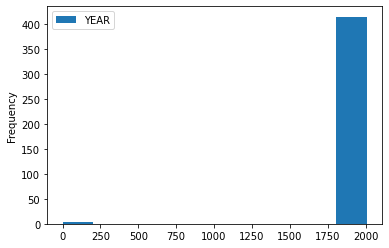

In [4]:
#identifying wildfires by year
df.plot.hist(y = 'YEAR')

In [5]:
df['DECADE'].value_counts()

1990    53
1950    50
1970    50
1980    47
1920    40
1940    38
1930    34
1960    34
2000    34
1910    27
0        4
1900     4
1890     3
Name: DECADE, dtype: int64

# Skewed Data
We know from the data that it is highly unlikely that there were 0 wildfires between years 1-1889, so it is safe to assume that any fires before 1889 were assigned the year value "0". This is because the year is unknown. Because of these values skewing our data, we have to discount the 4 fires recorded before 1880. This will still leave us with a sample size of over 400 wildfires where the year is known. 

In [6]:
#drop values with year "0"
df = df.drop(df[df.DECADE<1000].index)

In [7]:
df['DECADE'].value_counts()

1990    53
1950    50
1970    50
1980    47
1920    40
1940    38
1930    34
1960    34
2000    34
1910    27
1900     4
1890     3
Name: DECADE, dtype: int64

In [8]:
#sort data by size
df.sort_values('Hectares')

,X,Y,NAME,ACRES_RPT,ACRES_CALC,COMMENT,RUCODE,FULL_LABEL,INCIDENT_N,DECADE,...,CAUSE,REPORT_AC,INC_NUM,CONTR_NUM,PROJ_NAME,BURN_DATE,END_DATE,RX_TYPE,RX_CONSUM,Hectares
415,104938.82300,-403377.4281,NaN,6,6,Walked Perimeter,NaN,9/11/2009,VNC 09-0052554,2000,...,0,5.6,52554.0,NaN,NaN,NaN,NaN,0,0,0.000000
414,119348.09460,-389370.0642,Ranch,54716,58410,NaN,NaN,10/20/2007,NaN,2000,...,2,54716.0,166.0,NaN,NaN,1899/12/30,1899/12/30,0,0,0.000000
416,88662.00070,-436143.2249,La Jolla,22,22,Walked Perimeter,NaN,10/16/2008,VNC 09-0054055,2000,...,0,22.0,NaN,NaN,NaN,NaN,NaN,0,0,0.000000
230,69680.79335,-393769.4382,Foothill,16,5,NaN,NaN,7/1/1968,NaN,1960,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,2.299969
223,79315.08305,-395290.8630,Sisar Canyon,25,6,NaN,NaN,10/10/1967,NaN,1960,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,2.683531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,126779.97180,-415154.9890,Clampett,107163,116766,NaN,NaN,9/25/1970,NaN,1970,...,11,107163.0,NaN,NaN,NaN,NaN,NaN,0,0,47259.704910
310,60788.81017,-389182.3594,Wheeler #2,118000,122724,NaN,VNC,7/1/1985,CA1985VNC00757400459,1980,...,0,122000.0,NaN,NaN,NaN,NaN,NaN,0,0,49642.551460
407,99173.07639,-378048.3717,Day Fire,162705,161815,NaN,NaN,Day Fire,CA-LPF-2023,2000,...,0,162705.0,NaN,NaN,NaN,1899/12/30,1899/12/30,0,0,65474.707540
83,84898.04679,-387173.5690,Matilija,220000,220044,NaN,NaN,9/7/1932,NaN,1930,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,89017.557310


<AxesSubplot:xlabel='YEAR', ylabel='Hectares'>

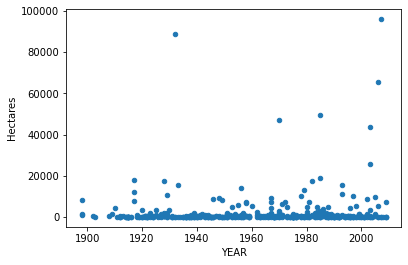

In [9]:
#identifying wildfires by size by year
df.plot.scatter(x='YEAR',y='Hectares')

# Usable Data
Now our data is clean and ready to be saved as a new CSV.

In [10]:
df.to_csv('VCWildfires.csv')